In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Controlled randomness
NB_Seed = 123123

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def setindexdatetime(df, index_col):
    df[index_col] = pd.to_datetime(df[index_col])
    df.set_index(index_col, inplace=True)
    df = df.astype(np.float)
    return df

In [3]:
tr = pd.read_csv('valids/v_tr.csv')

In [4]:
tr = setindexdatetime(tr,'Timestamp') 

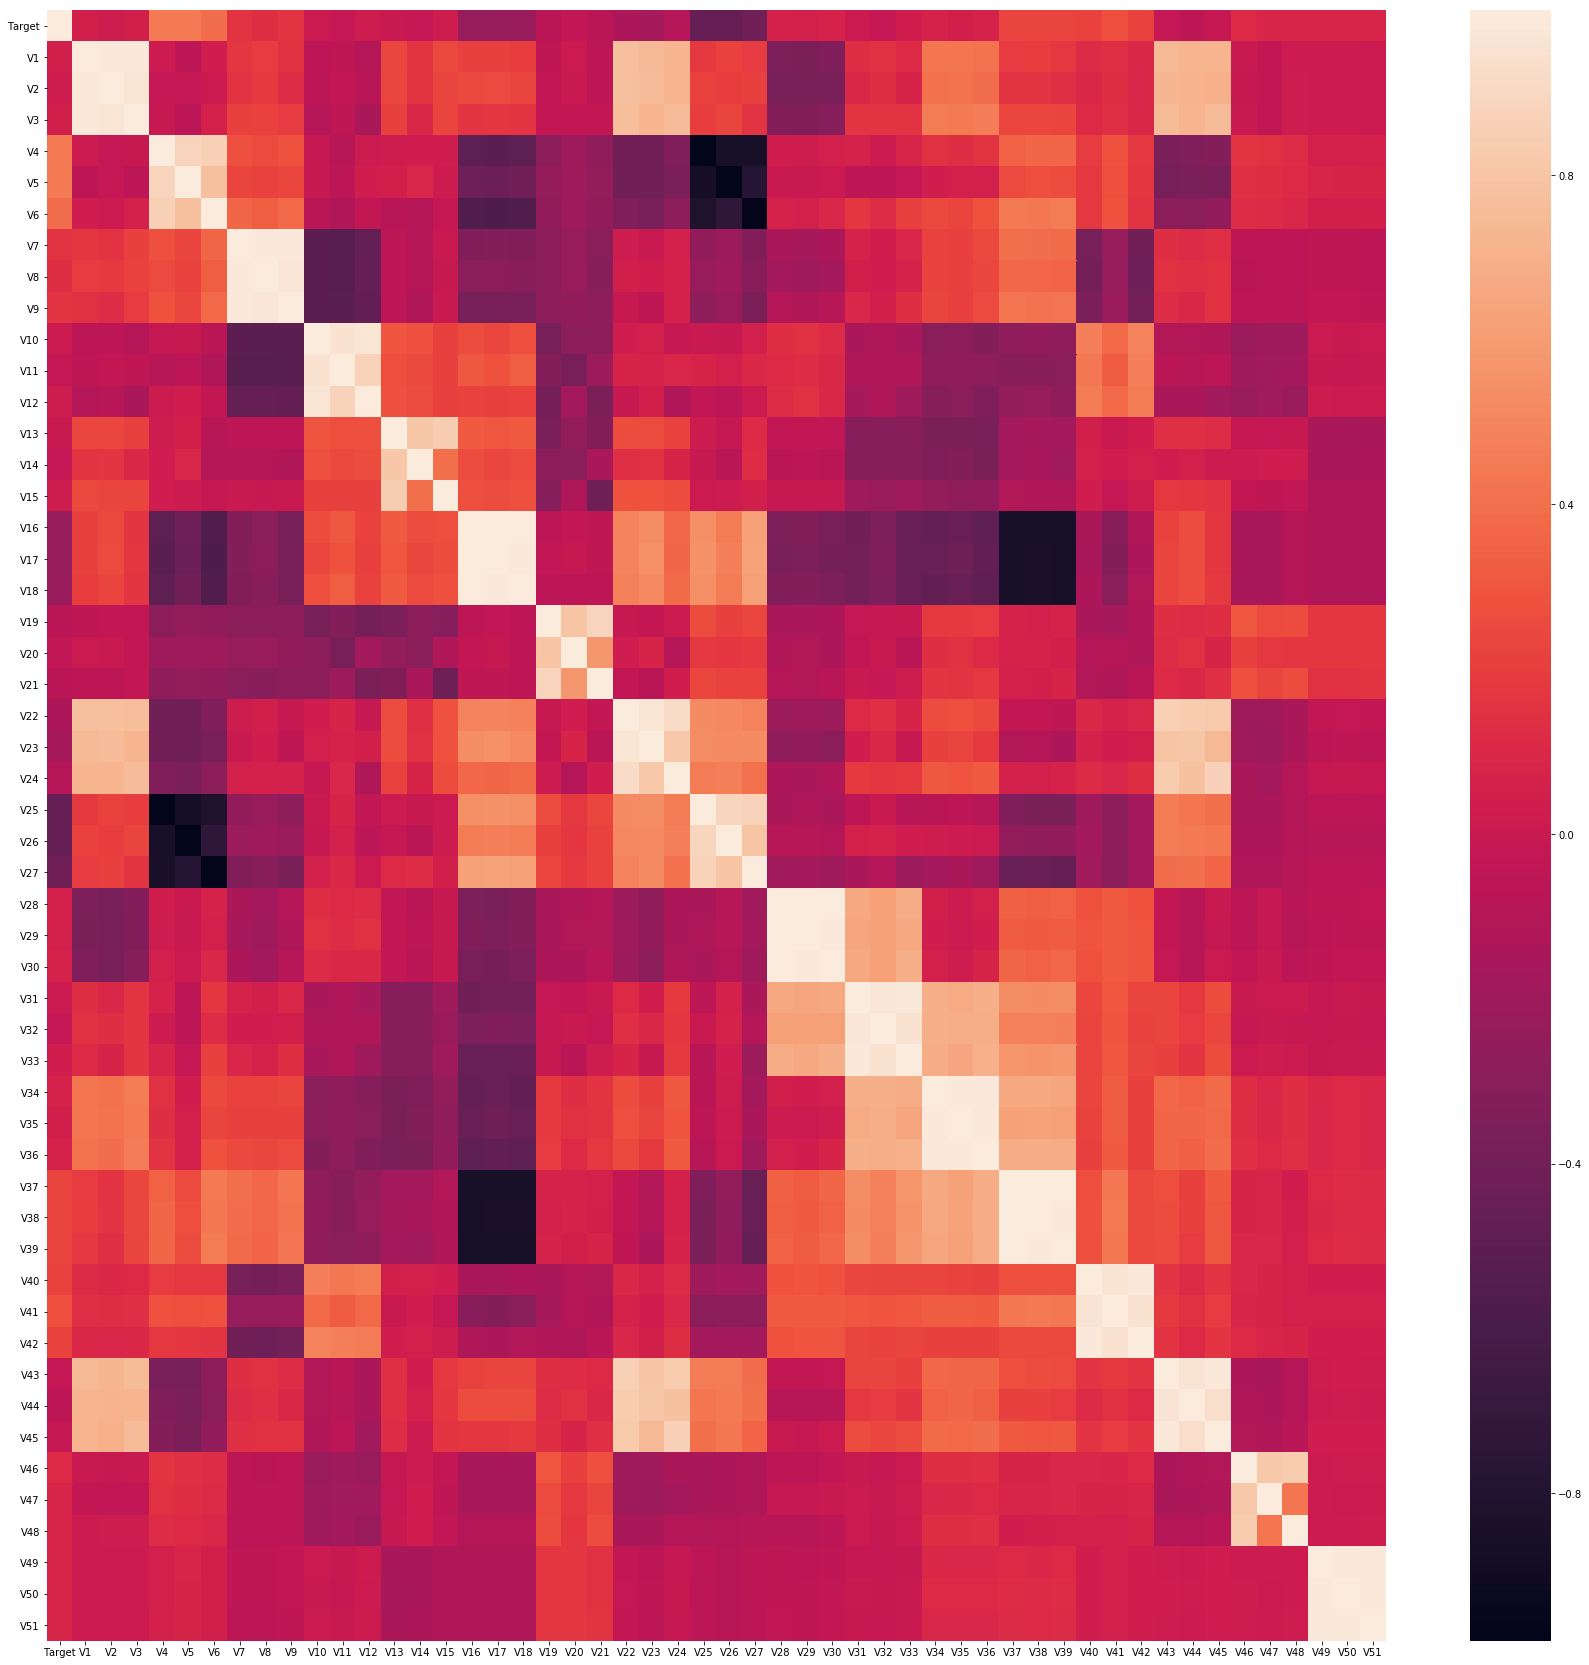

In [5]:
#before moving any further, find out feature importances.
plt.figure(figsize=(30,30))
sns.heatmap(tr.corr())

In [6]:
from helpers.funcs import plotModelResults, plotCoefficients, timeseries_train_test_split as TSSplit, fit_model_cv
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
x_tr, x_ts, y_tr, y_ts = TSSplit(tr.drop('Target',1),tr.Target, test_size=0.3)
scaler = StandardScaler()
x_tr_sc = scaler.fit_transform(x_tr)
x_ts_sc = scaler.fit_transform(x_ts)
tscv = TimeSeriesSplit(n_splits=5)
lasso = LassoCV(cv=tscv, random_state=NB_Seed, max_iter=2000)

In [8]:
lasso.fit(x_tr_sc, y_tr)

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

LassoCV(alphas=None, copy_X=True,
    cv=TimeSeriesSplit(max_train_size=None, n_splits=5), eps=0.001,
    fit_intercept=True, max_iter=2000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto',
    random_state=123123, selection='cyclic', tol=0.0001, verbose=False)

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

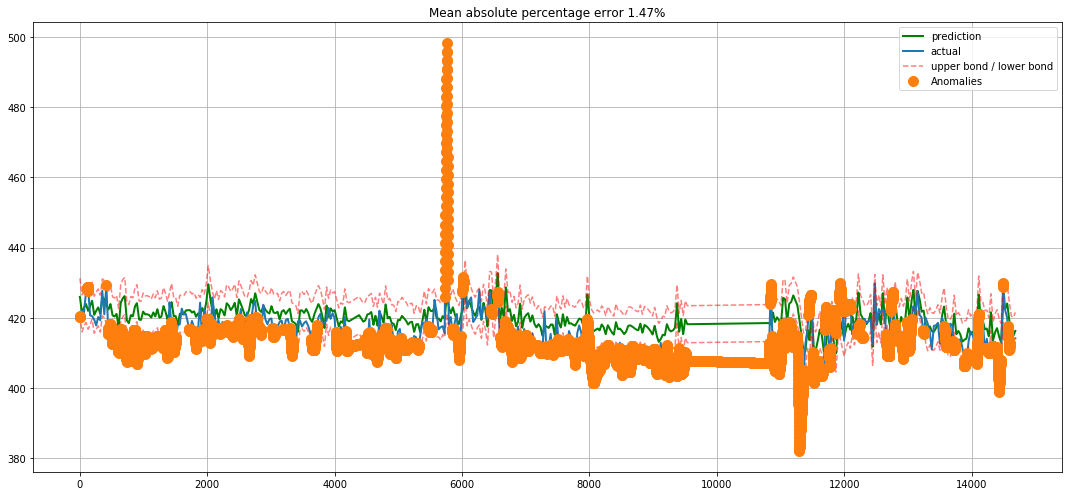

In [ ]:
plotModelResults(lasso, x_tr_sc, x_ts_sc, y_tr, y_ts, tscv, plot_anomalies=True, plot_intervals=True)

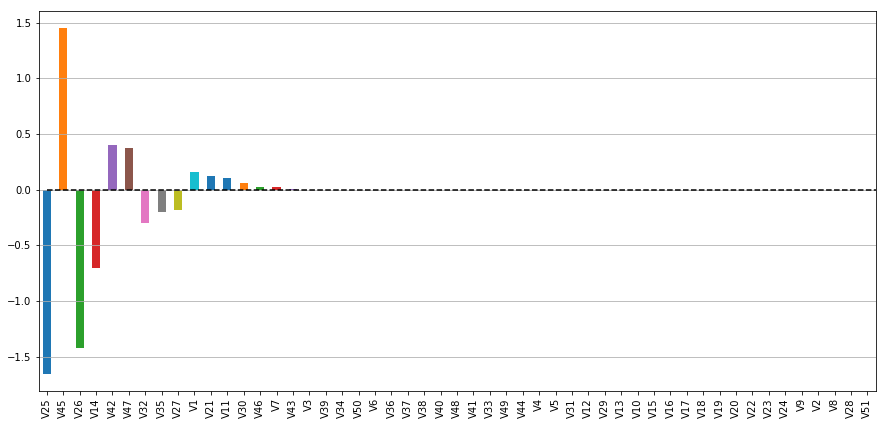

In [ ]:
coef = plotCoefficients(lasso, x_tr)

In [ ]:
coef = coef[coef.coef!=0]

In [ ]:
nonzeroftrs = list(coef.index.values)
nonzeroftrs.append('Target')
trnz = tr.loc[:,nonzeroftrs].copy()

In [ ]:
from sklearn.ensemble import IsolationForest

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
x_tr, x_val, y_tr, y_val = TSSplit(trnz.drop('Target',1),trnz.Target, test_size=0.3)

In [ ]:
isfo = IsolationForest(n_estimators=1000,n_jobs=-1,random_state=NB_Seed)
x_ = x_tr.values
y_ = y_tr.values

In [ ]:
mlist = fit_model_cv(isfo, x_, y_)

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/external

In [ ]:
xval = trnz.drop('Target',1)

In [ ]:
outliers = pd.DataFrame()
mdlpreds = list()
for i, m in enumerate(mlist):
    colnm = "model_" + str(i)
    mdlpreds.append(colnm)
    outliers[colnm] = m.predict(xval)

In [ ]:
outliers.index = trnz.index
outliers['sum_score'] = outliers.apply(lambda row:np.sum(row), axis=1)

In [ ]:
outliers['outlier'] = outliers.apply(lambda row: 1 if row.sum_score >= 4 else 0, axis=1)

In [ ]:
trnz = trnz.join(outliers.outlier)

In [ ]:
trnz[trnz.outlier == 1] = np.nan

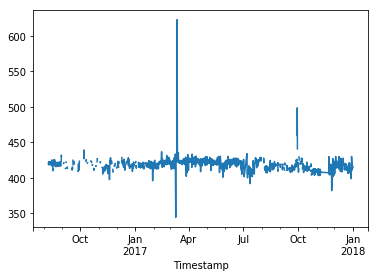

In [ ]:
trnz.Target.plot()

In [ ]:
trnz.Target.interpolate(method='time').plot()

In [ ]:
trnz = trnz.interpolate(method='time')

In [ ]:
trnz.drop('outlier',1,inplace=True)

In [ ]:
ts = pd.read_csv('valids/v_ts.csv')
ts = setindexdatetime(ts,'Timestamp')
ts = ts.loc[:,nonzeroftrs]

In [ ]:
ts.drop('Target',1,inplace=True)

In [ ]:
trnz.to_csv('valids/v_ready_tr.csv')
ts.to_csv('valids/v_ready_ts.csv')